In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import Model
(train_x,train_y),(test_x,test_y)=cifar10.load_data()
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


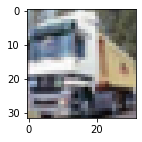

[9]


In [8]:
import matplotlib.pyplot as plt
figure=plt.figure(figsize=(2,2))
plt.imshow(train_x[1],cmap=plt.cm.binary)
plt.show()
print(train_y[1])

In [10]:
import os
checkpoint_save_path="./CIFAR10数据集模型参数/checkpoint_save"
if os.path.exists(checkpoint_save_path+".index"):
    print("---load model---")
    model.load_weights(checkpoint_save_path)
cifar10_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                    save_best_only=True,
                                                    save_weights_only=True)

class BaseModel(Model):
    def __init__(self):
        super(BaseModel,self).__init__()
        self.c1=tf.keras.layers.Conv2D(filters=6,kernel_size=(5,5),strides=2,padding="same")
        self.b1=tf.keras.layers.BatchNormalization()
        self.a1=tf.keras.layers.Activation("relu")
        self.p1=tf.keras.layers.MaxPool2D(pool_size=(2,2),padding="same",strides=(2,2))
        self.dropout=tf.keras.layers.Dropout(0.2)
        self.f1=tf.keras.layers.Flatten()
        self.d2=tf.keras.layers.Dense(units=64,activation="relu",kernel_regularizer=tf.keras.regularizers.l2())
        self.d3=tf.keras.layers.Dense(units=10,activation="softmax")
    def call(self,x):
        x=self.c1(x)
        x=self.b1(x)
        x=self.a1(x)
        x=self.p1(x)
        x=self.dropout(x)
        x=self.f1(x)
        x=self.d2(x)
        y=self.d3(x)
        return y
model=BaseModel()
model.compile(optimizer="adam",loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=["accuracy"])
train_x=train_x/255.0
test_x=test_x/255.0
train_history=model.fit(train_x,train_y,epochs=100,batch_size=50,validation_split=0.2,validation_freq=50,callbacks=[cifar10_callback]) 
with open("./CIFAR10数据集模型参数/weights.txt","w") as fp:
    for v in model.trainable_variables:
        fp.write(str(v.name)+"\n")
        fp.write(str(v.shape)+"\n")
        fp.write(str(v.numpy()+"\n"))
print(train_history)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 56s 1ms/sample - loss: 2.1057 - accuracy: 0.3882
Epoch 2/100
40000/40000 [==============================] - 29s 730us/sample - loss: 1.6046 - accuracy: 0.4701
Epoch 3/100
40000/40000 [==============================] - 29s 737us/sample - loss: 1.5208 - accuracy: 0.4973
Epoch 4/100
40000/40000 [==============================] - 29s 723us/sample - loss: 1.4845 - accuracy: 0.5066
Epoch 5/100
40000/40000 [==============================] - 28s 705us/sample - loss: 1.4691 - accuracy: 0.5125
Epoch 6/100
40000/40000 [==============================] - 29s 722us/sample - loss: 1.4502 - accuracy: 0.5216
Epoch 7/100
40000/40000 [==============================] - 28s 706us/sample - loss: 1.4307 - accuracy: 0.5269
Epoch 8/100
40000/40000 [==============================] - 28s 708us/sample - loss: 1.4242 - accuracy: 0.5319
Epoch 9/100
40000/40000 [==============================] - 30s 743us/sam

40000/40000 [==============================] - 39s 983us/sample - loss: 1.2782 - accuracy: 0.5945
Epoch 60/100
40000/40000 [==============================] - 40s 1ms/sample - loss: 1.2755 - accuracy: 0.5922
Epoch 61/100
40000/40000 [==============================] - 37s 917us/sample - loss: 1.2804 - accuracy: 0.5940
Epoch 62/100
40000/40000 [==============================] - 38s 960us/sample - loss: 1.2810 - accuracy: 0.5929
Epoch 63/100
40000/40000 [==============================] - 37s 922us/sample - loss: 1.2769 - accuracy: 0.5923
Epoch 64/100
40000/40000 [==============================] - 37s 914us/sample - loss: 1.2815 - accuracy: 0.5917
Epoch 65/100
40000/40000 [==============================] - 40s 1ms/sample - loss: 1.2773 - accuracy: 0.5943
Epoch 66/100
40000/40000 [==============================] - 35s 885us/sample - loss: 1.2736 - accuracy: 0.5929
Epoch 67/100
40000/40000 [==============================] - 34s 859us/sample - loss: 1.2744 - accuracy: 0.5932
Epoch 68/100
40000

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')